# Introduction to Pandas

## What is Pandas?

Pandas is a powerful and versatile open-source Python library designed for data manipulation and analysis. It provides high-performance, easy-to-use data structures, like **Series** and **DataFrame**, which are essential for handling and analyzing structured data.

## Why Use Pandas?

- **Data Wrangling**: Simplifies tasks like cleaning, reshaping, and merging datasets.
- **Data Exploration**: Makes it easy to load, filter, and analyze data with intuitive syntax.
- **Built-in Functions**: Provides a rich set of methods for statistical analysis, aggregation, and visualization.
- **Seamless Integration**: Works well with other Python libraries, including NumPy, Matplotlib, and scikit-learn.

## Key Features of Pandas

1. **Data Structures**: 
   - `Series`: One-dimensional labeled array, like a column in a spreadsheet.
   - `DataFrame`: Two-dimensional labeled data structure, similar to a table in a database.

2. **Data Handling**:
   - Loading data from CSV, Excel, SQL, or JSON files.
   - Indexing, filtering, and slicing for easy data access.

3. **Data Analysis**:
   - Grouping and aggregation (`groupby`).
   - Handling missing data (`fillna`, `dropna`).
   - Time-series functionality.

4. **Data Visualization**:
   - Integrates well with libraries like Matplotlib and Seaborn for plotting.


# Basic Data Manipulation with Pandas

## Dataset: Patient Data

For this lecture, we will use a dataset that represents patient information in a clinical trial. The dataset includes details about patient demographics, treatment types, and their responses. Here’s a quick preview:

| PatientID | Age | Gender | Treatment      | Response          | GeneExpression |
|-----------|-----|--------|----------------|-------------------|----------------|
| P001      | 45  | Female | Chemotherapy   | Complete Response | 1.2            |
| P002      | 60  | Male   | Immunotherapy  | Partial Response  | 2.5            |
| P003      | 35  | Female | Chemotherapy   | No Response       | 0.8            |
| P004      | 50  | Male   | Targeted Drug  | Complete Response | 3.1            |
| P005      | 40  | Female | Immunotherapy  | No Response       | 1.5            |

---

## Key Operations in Pandas

### 1. Loading the Data

First, we’ll load this dataset into a pandas DataFrame.

```python
import pandas as pd

# Sample data
data = {
    "PatientID": ["P001", "P002", "P003", "P004", "P005"],
    "Age": [45, 60, 35, 50, 40],
    "Gender": ["Female", "Male", "Female", "Male", "Female"],
    "Treatment": ["Chemotherapy", "Immunotherapy", "Chemotherapy", "Targeted Drug", "Immunotherapy"],
    "Response": ["Complete Response", "Partial Response", "No Response", "Complete Response", "No Response"],
    "GeneExpression": [1.2, 2.5, 0.8, 3.1, 1.5]
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df)
```

### 2. Exploring the Data

```python
# Display the first few rows
print(df.head())

# Get a summary of the data
print(df.info())
```

### 3. Filtering and Subsetting

```python
# Filter patients with a "Complete Response"
complete_response = df[df["Response"] == "Complete Response"]
print(complete_response)

# Select specific columns
selected_columns = df[["PatientID", "Treatment", "Response"]]
print(selected_columns)
```

### 4. Adding New Columns

```python
# Add a new column indicating whether the patient is above 50 years old
df["Above50"] = df["Age"] > 50
print(df)
```

### 5. Grouping and Aggregation

```python
# Group by Treatment and calculate the average GeneExpression
grouped_data = df.groupby("Treatment")["GeneExpression"].mean()
print(grouped_data)
```


In [8]:
import pandas as pd 
import numpy as np 

data = {
    "PatientID": ["P001", "P002", "P003", "P004", "P005","P006"],
    "Age": [45, 60, 35, 50, 40,np.nan],
    "Gender": ["Female", "Male", "Female", "Male", "Female",np.nan],
    "Treatment": ["Chemotherapy", "Immunotherapy", "Chemotherapy", "Targeted Drug", "Immunotherapy",np.nan],
    "Response": ["Complete Response", "Partial Response", "No Response", "Complete Response", "No Response",np.nan],
    "GeneExpression": [1.2, 2.5, 0.8, 3.1, 1.5,np.nan]
}

df = pd.DataFrame(data)
df.head(6)

,PatientID,Age,Gender,Treatment,Response,GeneExpression
0,P001,45.0,Female,Chemotherapy,Complete Response,1.2
1,P002,60.0,Male,Immunotherapy,Partial Response,2.5
2,P003,35.0,Female,Chemotherapy,No Response,0.8
3,P004,50.0,Male,Targeted Drug,Complete Response,3.1
4,P005,40.0,Female,Immunotherapy,No Response,1.5
5,P006,NaN,NaN,NaN,NaN,NaN


In [23]:
#print(df.info())

age = np.array(df["Age"])

age = df["Age"].to_numpy()

df_complete_response = df[df["Response"] == "Complete Response"]

df_complete_response = df_complete_response.reset_index()

age_complete_response = df_complete_response["Age"].to_numpy()

print(age_complete_response)
df_complete_response.head()

[45. 50.]


,index,PatientID,Age,Gender,Treatment,Response,GeneExpression
0,0,P001,45.0,Female,Chemotherapy,Complete Response,1.2
1,3,P004,50.0,Male,Targeted Drug,Complete Response,3.1


In [22]:
# index localiser - index for rows and columns
df.iloc[0:3,0:3]

# index for rows, names for columns 
df.loc[0:3,["Age","Gender"]]

,Age,Gender
0,45.0,Female
1,60.0,Male
2,35.0,Female
3,50.0,Male


In [30]:
# Two condition: 1) complete response 2) Age > 40 

df_final = df[(df["Response"] == "Complete Response") & (df["Age"] > 45)]


# Adding a new column 

df["expressionByAge"] = df["GeneExpression"] / df["Age"] 

df.loc[5,"Age"] = 23

df.head(6)

,PatientID,Age,Gender,Treatment,Response,GeneExpression,expressionByAge
0,P001,45.0,Female,Chemotherapy,Complete Response,1.2,0.026667
1,P002,60.0,Male,Immunotherapy,Partial Response,2.5,0.041667
2,P003,35.0,Female,Chemotherapy,No Response,0.8,0.022857
3,P004,50.0,Male,Targeted Drug,Complete Response,3.1,0.062000
4,P005,40.0,Female,Immunotherapy,No Response,1.5,0.037500
5,P006,23.0,NaN,NaN,NaN,NaN,NaN


In [42]:
df = df.reset_index()

df.reset_index(inplace=True)

df["Age"].dropna(inplace=True)
df.head(6)

,level_0,index,PatientID,Age,Gender,Treatment,Response,GeneExpression,expressionByAge
0,0,0,P001,45.0,Female,Chemotherapy,Complete Response,1.2,0.026667
1,1,1,P002,60.0,Male,Immunotherapy,Partial Response,2.5,0.041667
2,2,2,P003,35.0,Female,Chemotherapy,No Response,0.8,0.022857
3,3,3,P004,50.0,Male,Targeted Drug,Complete Response,3.1,0.062000
4,4,4,P005,40.0,Female,Immunotherapy,No Response,1.5,0.037500


In [45]:
# Now let's look at a real dataset
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arifmia/heart-attack-risk-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/heart_attack_risk_dataset.csv")
print(df.info())
df.head()

Path to dataset files: /Users/arman/.cache/kagglehub/datasets/arifmia/heart-attack-risk-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level           

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


# Example Problems with Heart Attack Risk Dataset

## Dataset Overview

The Heart Attack Risk Prediction Dataset contains 50,000 rows and 20 features, including demographic, clinical, lifestyle, and diagnostic attributes. The target variable is `Heart_Attack_Risk` (Low, Moderate, High).

---

## Example Problems

### 1. Data Exploration
- Identify the number of rows, columns, and data types of each feature.
- Find the summary statistics for numerical columns (e.g., `Age`, `BMI`, `Cholesterol_Level`).

### 2. Handling Missing Values
- Check for missing values in each column.
- Fill missing values with the mean for numerical features and mode for categorical features.

### 3. Filtering and Subsetting Data
- Extract rows where `Smoking == 1` and `Heart_Attack_Risk == 'High'`.
- Subset individuals aged above 50 with `Family_History == 1`.

### 4. Grouping and Aggregation
- Group by `Heart_Attack_Risk` and calculate the mean `BMI`, `Cholesterol_Level`, and `Resting_BP`.
- Group by `Gender` and calculate the percentage of individuals with `Diabetes == 1`.

### 5. Feature Analysis
- Calculate the proportion of individuals in each `Stress_Level` category.
- Find the most common `Chest_Pain_Type` for `Heart_Attack_Risk == 'High'`.

### 6. Feature Engineering
- Create a binary `High_BMI` column (`1` if `BMI > 30`, else `0`).
- Create an `Age_Group` column categorizing ages into ranges (e.g., `18-30`, `31-45`, etc.).

### 7. Statistical Analysis
- Calculate the correlation between `BMI` and `Cholesterol_Level`.
- Test whether average `Resting_BP` differs across `Heart_Attack_Risk` categories.

### 8. Visualization
- Plot the distribution of `Age` for each `Heart_Attack_Risk` category.
- Create a bar chart showing the count of `Heart_Attack_Risk` levels grouped by `Gender`.


count    50000.000000
mean        27.519357
std          7.225176
min         15.000000
25%         21.270000
50%         27.540000
75%         33.770000
max         40.000000
Name: BMI, dtype: float64
Empty DataFrame
Columns: [Age, Gender, Smoking, Alcohol_Consumption, Physical_Activity_Level, BMI, Diabetes, Hypertension, Cholesterol_Level, Resting_BP, Heart_Rate, Family_History, Stress_Level, Chest_Pain_Type, Thalassemia, Fasting_Blood_Sugar, ECG_Results, Exercise_Induced_Angina, Max_Heart_Rate_Achieved, Heart_Attack_Risk]
Index: []
Heart_Attack_Risk
High        27.508963
Low         27.522693
Moderate    27.520781
Name: BMI, dtype: float64
Heart_Attack_Risk
High        225.109035
Low         224.870412
Moderate    225.266157
Name: Cholesterol_Level, dtype: float64
Heart_Attack_Risk
High        134.221009
Low         134.598625
Moderate    134.301865
Name: Resting_BP, dtype: float64


Text(0.5, 1.0, 'BMI High')

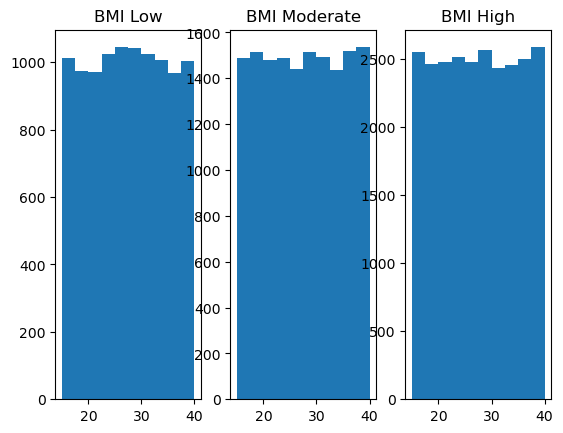

In [59]:
# Let's spend some time working on this 

# Part a 

print(df["BMI"].describe())

# Part b 

df_isna = df[df["BMI"].isna()] 

print(df_isna)

# part c 

df_smoke_high = df[(df["Smoking"] == 1) & (df["Heart_Attack_Risk"] == "High")]
df_smoke_high.head()

# part d 

print(df.groupby("Heart_Attack_Risk")["BMI"].mean())
print(df.groupby("Heart_Attack_Risk")["Cholesterol_Level"].mean())
print(df.groupby("Heart_Attack_Risk")["Resting_BP"].mean())

# visualization 

import matplotlib.pyplot as plt 

df_high = df[df["Heart_Attack_Risk"] == "High"]
df_mod = df[df["Heart_Attack_Risk"] == "Moderate"]
df_low = df[df["Heart_Attack_Risk"] == "Low"]

BMI_low = df_high["BMI"].to_numpy()
BMI_mod = df_mod["BMI"].to_numpy()
BMI_high = df_low["BMI"].to_numpy()

plt.subplot(1,3,1)
plt.hist(BMI_low)
plt.title("BMI Low")
plt.subplot(1,3,2)
plt.hist(BMI_mod)
plt.title("BMI Moderate")
plt.subplot(1,3,3)
plt.hist(BMI_high)
plt.title("BMI High")

# Advanced Pandas Functions and Techniques

## Overview

In this section, we will explore advanced pandas functions and techniques that are essential for efficient data manipulation and analysis. These functions help streamline workflows, handle complex data transformations, and optimize performance.

---

## Advanced Pandas Functions

### 1. Pivot Tables
- **Description**: Reshape data and calculate aggregations.
- **Example**:
  ```python
  # Create a pivot table showing average BMI grouped by Gender and Heart_Attack_Risk
  pivot = df.pivot_table(values='BMI', index='Gender', columns='Heart_Attack_Risk', aggfunc='mean')
  print(pivot)
  ```

### 2. Apply and Map Functions
- **Description**: Apply custom functions to rows or columns.
- **Example**:
  ```python
  # Apply a custom function to calculate BMI categories
  def bmi_category(bmi):
      if bmi < 18.5:
          return 'Underweight'
      elif 18.5 <= bmi < 25:
          return 'Normal weight'
      elif 25 <= bmi < 30:
          return 'Overweight'
      else:
          return 'Obesity'

  df['BMI_Category'] = df['BMI'].apply(bmi_category)
  print(df[['BMI', 'BMI_Category']])
  ```

### 3. Merging and Joining
- **Description**: Combine multiple DataFrames.
- **Example**:
  ```python
  # Merge patient data with treatment data on PatientID
  merged_df = pd.merge(patient_df, treatment_df, on='PatientID', how='inner')
  print(merged_df)
  ```

### 4. MultiIndex
- **Description**: Work with hierarchical indexing for complex data.
- **Example**:
  ```python
  # Set a MultiIndex using Gender and Heart_Attack_Risk
  multi_df = df.set_index(['Gender', 'Heart_Attack_Risk'])
  print(multi_df)
  ```

### 5. Window Functions
- **Description**: Perform rolling or expanding computations.
- **Example**:
  ```python
  # Calculate rolling average of Cholesterol_Level over a window of 3
  df['Rolling_Avg_Cholesterol'] = df['Cholesterol_Level'].rolling(window=3).mean()
  print(df[['Cholesterol_Level', 'Rolling_Avg_Cholesterol']])
  ```

### 6. Exploding Lists
- **Description**: Expand lists stored in a single column into multiple rows.
- **Example**:
  ```python
  # Expand a column with lists of symptoms into separate rows
  df['Symptoms'] = df['Symptoms'].str.split(',')
  exploded_df = df.explode('Symptoms')
  print(exploded_df)
  ```

### 7. Query Function
- **Description**: Filter data using an SQL-like syntax.
- **Example**:
  ```python
  # Filter patients with BMI > 30 and Heart_Attack_Risk == 'High'
  filtered_df = df.query("BMI > 30 and Heart_Attack_Risk == 'High'")
  print(filtered_df)
  ```

### 8. DataFrame Exploding and Aggregation
- **Description**: Summarize data efficiently.
- **Example**:
  ```python
  # Aggregate by Gender and calculate mean Cholesterol_Level
  aggregated_df = df.groupby('Gender')['Cholesterol_Level'].agg(['mean', 'max', 'min'])
  print(aggregated_df)
  ```

---

## Summary

These advanced pandas functions provide powerful tools for managing, transforming, and analyzing complex datasets. By mastering these techniques, you can tackle real-world data challenges with greater efficiency and confidence.


# Introduction to GitHub and Version Control

## What is Version Control?

Version control is a system that allows you to track changes to your files and collaborate with others effectively. It is essential for managing projects, especially in software development, where multiple contributors work on the same codebase.

### Key Features of Version Control
- **Track Changes**: Keeps a history of modifications, enabling you to revert to previous versions if needed.
- **Collaboration**: Allows multiple people to work on the same project simultaneously without conflicts.
- **Branching and Merging**: Facilitates the creation of separate branches for features or fixes and merging them back into the main project.

---

## What is Git?

Git is a popular version control system that manages your project's source code and keeps track of all changes. It is distributed, meaning each user has a complete copy of the project repository.

### Common Git Commands
- `git init`: Initialize a new Git repository.
- `git add`: Stage changes for a commit.
- `git commit`: Save changes to the repository with a message.
- `git push`: Upload changes to a remote repository (e.g., GitHub).
- `git pull`: Fetch and merge changes from a remote repository.
- `git status`: Check the status of your working directory and staged changes.

---

## What is GitHub?

GitHub is a cloud-based platform that hosts Git repositories. It provides tools for collaboration, code review, and project management, making it a central hub for development projects.

### Why Use GitHub?
- **Backup and Accessibility**: Your code is stored in the cloud and accessible from anywhere.
- **Collaboration**: Teams can work together using features like pull requests and code reviews.
- **Community**: Share and discover open-source projects.
- **Integration**: Works seamlessly with CI/CD tools, project boards, and more.

---

## Getting Started with GitHub

### 1. Create a Repository
- Log in to GitHub and click on **New Repository**.
- Name your repository and choose its visibility (Public or Private).

### 2. Clone a Repository
```bash
git clone https://github.com/username/repository.git
```

### 3. Make Changes and Commit
- Edit your files locally.
- Stage the changes:
  ```bash
  git add .
  ```
- Commit the changes:
  ```bash
  git commit -m "Your commit message"
  ```

### 4. Push Changes to GitHub
```bash
git push origin main
```

### 5. Open a Pull Request
- When working collaboratively, push your changes to a new branch and open a pull request for review.

---

## Basic Workflow Summary

1. **Initialize a repository**: `git init`
2. **Make changes**: Edit files locally.
3. **Stage changes**: `git add <file>`
4. **Commit changes**: `git commit -m "message"`
5. **Push changes**: `git push`

---

## Additional GitHub Features
- **Issues**: Track bugs and feature requests.
- **Actions**: Automate workflows such as testing and deployment.
- **Wiki**: Create documentation for your project.
- **Project Boards**: Organize tasks visually using Kanban-style boards.

---

## Summary

GitHub and version control systems like Git are powerful tools for managing projects, enabling collaboration, and maintaining a history of changes. By mastering these tools, you can streamline your workflow and contribute effectively to team projects.
